<a href="https://colab.research.google.com/github/dln277/portfolio/blob/main/Leda_Technical_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

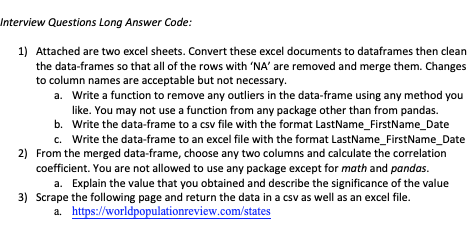

**1. Dataframe Creation and Cleaning**


In [ ]:
#Import Interview_Excel_1 and Interview_Excel_2

from google.colab import files 
uploaded = files.upload()

Saving Interview_Excel_2.xlsx to Interview_Excel_2.xlsx
Saving Interview_Excel_1.xlsx to Interview_Excel_1.xlsx


In [ ]:
import pandas as pd
import numpy as np
#Read data into pandas

#Interview_Excel_1 stored as state_pop
state_pop = pd.read_excel('Interview_Excel_1.xlsx', thousands=',')

#Interview_Excel_2 stored state_case 
state_case = pd.read_excel('Interview_Excel_2.xlsx', thousands=',')

In [ ]:
state_pop.head()

In [ ]:
state_case.head()

In [ ]:
#Drop rows where there's an "NA" value 

state_pop = state_pop.dropna()

In [ ]:
state_case = state_case.dropna()

In [ ]:
#Merge two dataframes on "State"
merged_state = state_pop.merge(state_case,left_on='State', right_on='State')
merged_state.head()

In [ ]:
#Clean up merged dataframe by removing duplicated columns and labeling unnamed columns
merged_state = merged_state.drop(columns=["Unnamed: 0_y"])
merged_state = merged_state.rename(columns={"Unnamed: 0_x":"No_"})
merged_state = merged_state.rename(columns={"Population ":"Population"})

In [ ]:
#Make sure variables are in the right datatype
merged_state.dtypes

In [ ]:
print(merged_state)

**1.a. Remove Outliers in DataFrame**


In [ ]:
#Quantile based flooring at 10th percentile, capping at 90th percentile 
#Values outside of the 10th-90th quantile would be considered outliers and removed 

for column in merged_state.iloc[:,2:14]:
  merged_state[column]= merged_state[column][merged_state[column].between(merged_state[column].quantile(.10),merged_state[column].quantile(0.90))]

merged_state = merged_state.dropna() #remove rows with removed outliers
print(merged_state)

    No_              State  ...  SANE-P (IFAN updated)  SANE-A (IFAN UPDATED)
3     5        Colorado,CO  ...                   36.0                   10.0
7    12        Illinois,IL  ...                   38.0                    4.0
8    13         Indiana,IN  ...                   20.0                   12.0
9    16        Kentucky,KY  ...                   10.0                    6.0
11   19        Maryland,MD  ...                   41.0                   13.0
14   22       Minnesota,MN  ...                   26.0                    6.0
18   26        Nebraska,NE  ...                   10.0                    2.0
20   28   New Hampshire,NH  ...                   36.0                    7.0
21   29      New Jersey,NJ  ...                   15.0                   15.0
26   35        Oklahoma,OK  ...                   10.0                    3.0
27   36          Oregon,OR  ...                    8.0                    5.0
29   39  South Carolina,SC  ...                    5.0          

**1.b. Write Dataframe to CSV**

In [ ]:
merged_state.to_csv('LeNguyen_Teddy_8-9-2020.csv',index = False, header = True)

**1.c. Write Dataframe to Excel**


In [ ]:
merged_state.to_excel('LeNguyen_Teddy_8-9-2020.xlsx',index=False)

**2. Calculating Correlation Coefficient**

In [ ]:
#I am interested in understanding the relationship between a state's population and its' number of sexual assault centers
#Their correlation coefficient are calculated as follows 

print(merged_state['Population'].corr(merged_state['# Sexual Assault Crisis Centers']))

0.621681102059519


The correlation coefficient between a state's population and its number of sexual assault crisis centers is 0.622, meaning that there is a moderate positive relationship between the two variables: as the state's population increases, the number of sexual assault crisis centers also likely to increase. However, it is important to note that correlation does not imply causation. Moreover, the sample size is quite small, only 12 observations after the removal of outliers; therefore, the analysis is not an absolute reflection of the truth. 

**3. Webscrape**

In [ ]:
import requests 
from bs4 import BeautifulSoup

url = 'https://worldpopulationreview.com/states' #specify the url
page = requests.get(url).text #query the website and return the html to the variable 'page'

soup = BeautifulSoup(page, 'lxml') #using beautiful soup to parse the html and store in variable'soup'
print(soup.prettify())

In [ ]:
#while inspecting the HTML scipts, I found that the table's content (i.e. state name, population, etc) are under class datatableStyles
#Find class in the html script and examine links contained 

my_table = soup.find('table',{'class':'datatableStyles__StyledTable-ysgkm4-1 dXImya table table-striped'})
my_table

<table class="datatableStyles__StyledTable-ysgkm4-1 dXImya table table-striped"><thead style="font-weight: bold;"><tr><th><span class="datatableStyles__StyledTableHeader-ysgkm4-2 imbgsi"><a data-field="rank" style="color: black; cursor: pointer; display: inline-block;">Rank  </a></span></th><th><span class="datatableStyles__StyledTableHeader-ysgkm4-2 imbgsi"><a data-field="State" style="color: black; cursor: pointer; display: inline-block;">State  </a></span></th><th><span class="datatableStyles__StyledTableHeader-ysgkm4-2 imbgsi"><a data-field="Pop" style="color: black; cursor: pointer; display: inline-block;">2020 Pop. <svg fill="currentColor" height="1em" stroke="currentColor" stroke-width="0" viewbox="0 0 320 512" width="1em" xmlns="http://www.w3.org/2000/svg"><path d="M31.3 192h257.3c17.8 0 26.7 21.5 14.1 34.1L174.1 354.8c-7.8 7.8-20.5 7.8-28.3 0L17.2 226.1C4.6 213.5 13.5 192 31.3 192z"></path></svg> </a></span></th><th><span class="datatableStyles__StyledTableHeader-ysgkm4-2 imbg

In [ ]:
#Extract all the links within <a> using find_all()

links = my_table.find_all('a')
links

In [ ]:
#Extract state names and headings from the links 
Texts = []
for link in links:
  Texts.append(link.text)

headings = Texts[0:9]
print(headings)

['Rank  ', 'State  ', '2020 Pop.  ', '2020 Growth  ', '2018 Pop.  ', '2010 Census  ', 'Growth Since 2010  ', '% of US  ', 'Density (p/mi²)  ']


In [ ]:
#Find all the rows of the table, organized by the headings
table_rows = my_table.find_all('tr')
rows = []
for tr in table_rows: 
  td = tr.find_all('td')
  row = [tr.text for tr in td]
  rows.append(row)

print(rows)

[[], ['1', 'California', '39,937,500', '0.96%', '39,557,000', '37,320,900', '7.01%', '11.94%', '256'], ['2', 'Texas', '29,472,300', '2.68%', '28,701,800', '25,242,700', '16.76%', '8.81%', '113'], ['3', 'Florida', '21,993,000', '3.26%', '21,299,300', '18,845,800', '16.70%', '6.58%', '410'], ['4', 'New York', '19,440,500', '-0.52%', '19,542,200', '19,400,100', '0.21%', '5.81%', '413'], ['5', 'Pennsylvania', '12,820,900', '0.11%', '12,807,100', '12,711,200', '0.86%', '3.83%', '287'], ['6', 'Illinois', '12,659,700', '-0.64%', '12,741,100', '12,840,800', '-1.41%', '3.79%', '228'], ['7', 'Ohio', '11,747,700', '0.50%', '11,689,400', '11,539,300', '1.81%', '3.51%', '288'], ['8', 'Georgia', '10,736,100', '2.06%', '10,519,500', '9,711,810', '10.55%', '3.21%', '187'], ['9', 'North Carolina', '10,611,900', '2.20%', '10,383,600', '9,574,290', '10.84%', '3.17%', '218'], ['10', 'Michigan', '10,045,000', '0.49%', '9,995,920', '9,877,540', '1.70%', '3.00%', '178'], ['11', 'New Jersey', '8,936,570', '0.

In [ ]:
#Merge the two lists, rows and headings to create the final dataframe
df = pd.DataFrame(rows, columns = headings)

#drop empty first row (excluding headings)
df = df.drop(df.index[0])
print(df)

In [ ]:
#Save to CSV 
df.to_csv('LeNguyen_Teddy_Webscrape.csv',index = False, header = True)

In [ ]:
#Save to Excel
df.to_excel('LeNguyen_Teddy_Webscrape.xlsx', index = False)